## 1- Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score,roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split # for Splitting the dataset
from sklearn.preprocessing import StandardScaler # for Feature Scaling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

## 2- Importing the dataset

In [2]:
data = pd.read_csv('customers.csv')
data.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
X = data.drop("Purchased",axis=1)
y = data['Purchased']

In [5]:
print(y[0:5])
X.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


# 3-Splitting the dataset into training and test sets

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# 4-Feature Scaling

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
Xtrain_scalled = scaler.transform(X_train)
Xtest_scalled = scaler.transform(X_test)

# 5-Training The Model on the training set and Predicting the Test set results

In [8]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Kernel SVM': SVC(kernel='rbf'),
    'Naïve Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [9]:
results = {}
for name, model in models.items():
    model.fit(Xtrain_scalled, Y_train)
    y_pred = model.predict(Xtest_scalled)
    accuracy = accuracy_score(Y_test, y_pred)
    results[name] = accuracy
    print(f'{name} - Accuracy: {accuracy}')

Logistic Regression - Accuracy: 0.925
K-Nearest Neighbors - Accuracy: 0.95
Support Vector Machine - Accuracy: 0.95
Kernel SVM - Accuracy: 0.95
Naïve Bayes - Accuracy: 0.9125
Decision Tree - Accuracy: 0.9
Random Forest - Accuracy: 0.9375


# 6-Predicting a new result

In [10]:
def predictNewResult(model,data):
    new_prediction = model.predict(scaler.transform(data))
    print('the result for ',"age = ",data[0][0],"and estimatedSalary = ",data[0][1],"is: ",new_prediction[0])

In [11]:
age = input("enter age:")
estimatedSalary= input("enter estimatedSalary:")
for name, model in models.items():
    print("for model ",name,end="   ")
    predictNewResult(model,np.array([[age,estimatedSalary]]))

enter age: 30
enter estimatedSalary: 3000


for model  Logistic Regression   the result for  age =  30 and estimatedSalary =  3000 is:  0
for model  K-Nearest Neighbors   the result for  age =  30 and estimatedSalary =  3000 is:  0
for model  Support Vector Machine   the result for  age =  30 and estimatedSalary =  3000 is:  0
for model  Kernel SVM   the result for  age =  30 and estimatedSalary =  3000 is:  0
for model  Naïve Bayes   the result for  age =  30 and estimatedSalary =  3000 is:  0
for model  Decision Tree   the result for  age =  30 and estimatedSalary =  3000 is:  0
for model  Random Forest   the result for  age =  30 and estimatedSalary =  3000 is:  0


# 7-Making the Confusion Matrix

Confusion Matrix - Logistic Regression:
[[57  1]
 [ 5 17]]


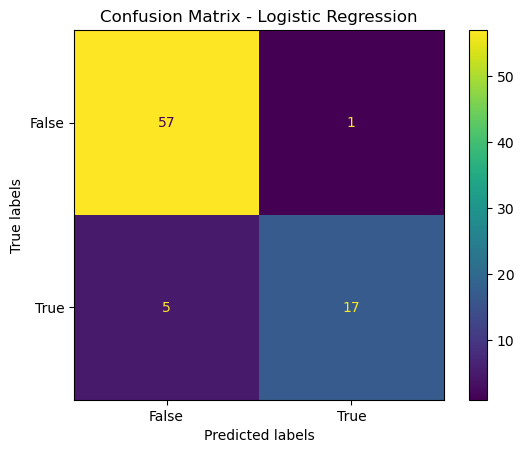

Confusion Matrix - K-Nearest Neighbors:
[[55  3]
 [ 1 21]]


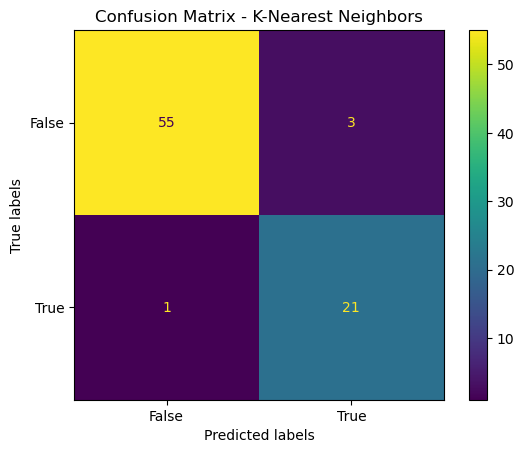

Confusion Matrix - Support Vector Machine:
[[55  3]
 [ 1 21]]


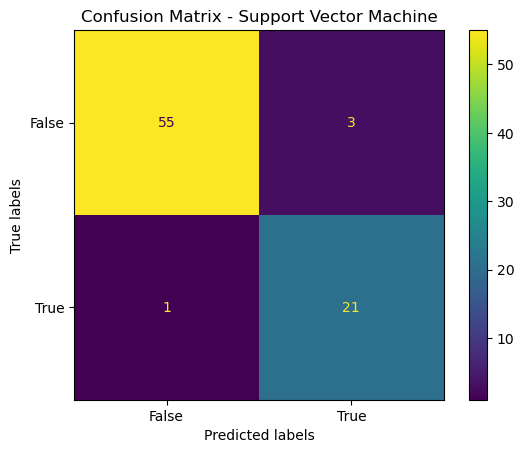

Confusion Matrix - Kernel SVM:
[[55  3]
 [ 1 21]]


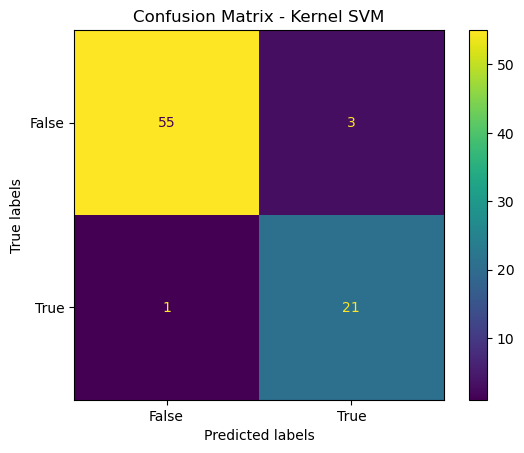

Confusion Matrix - Naïve Bayes:
[[55  3]
 [ 4 18]]


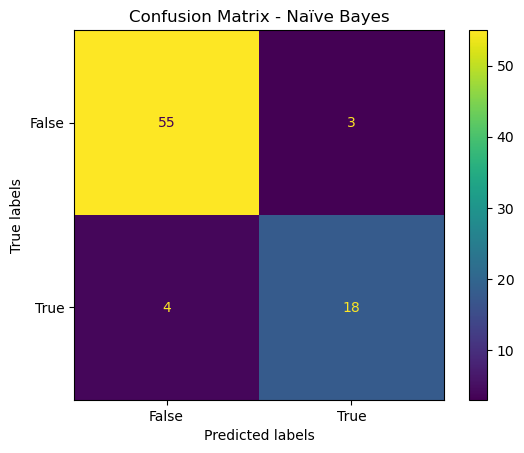

Confusion Matrix - Decision Tree:
[[53  5]
 [ 3 19]]


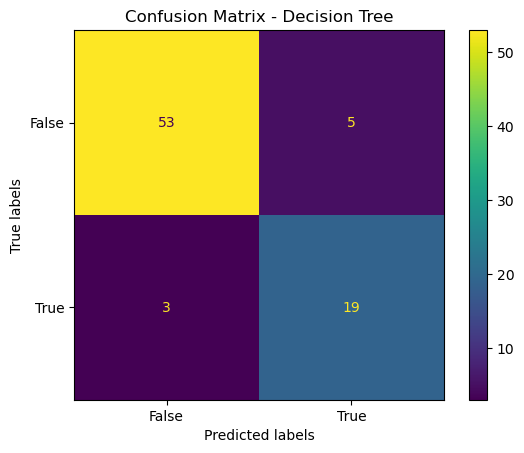

Confusion Matrix - Random Forest:
[[55  3]
 [ 2 20]]


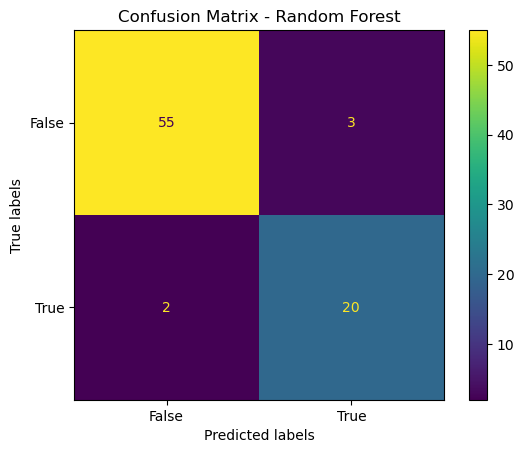

In [12]:
for name, model in models.items():
    y_pred = model.predict(Xtest_scalled)
    cm = confusion_matrix(Y_test, y_pred)
    print(f'Confusion Matrix - {name}:')
    print(cm)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
    cm_display.plot()
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# 8-Visualizing the Train set result

<Figure size 640x480 with 0 Axes>

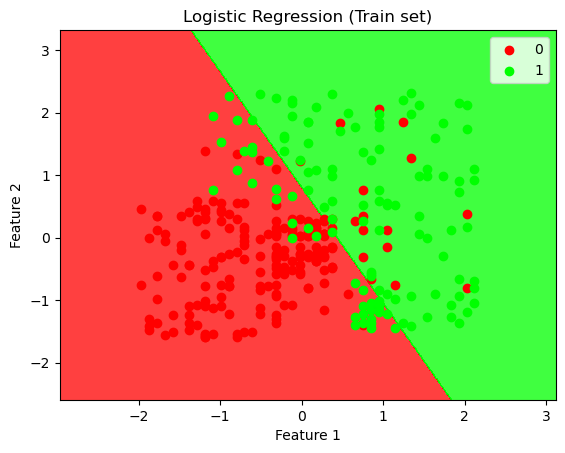

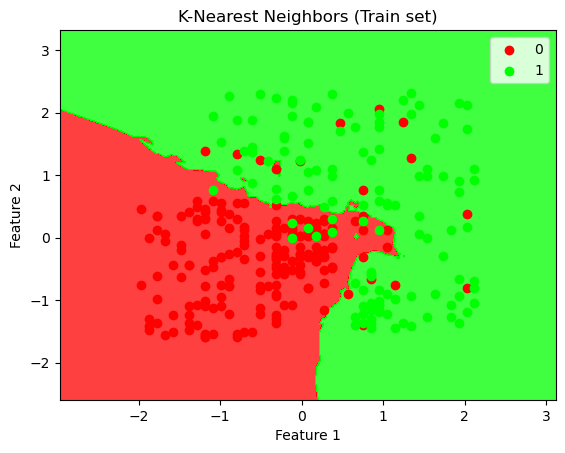

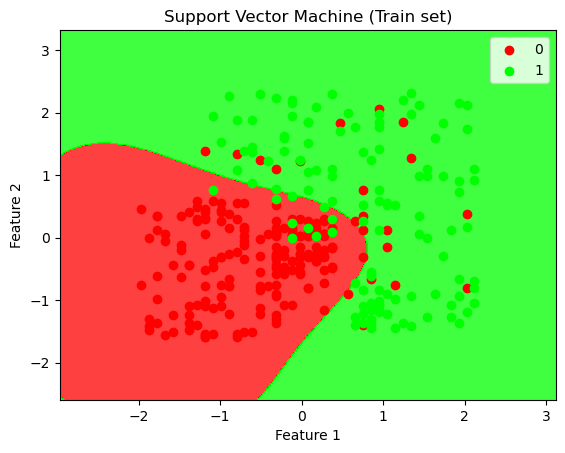

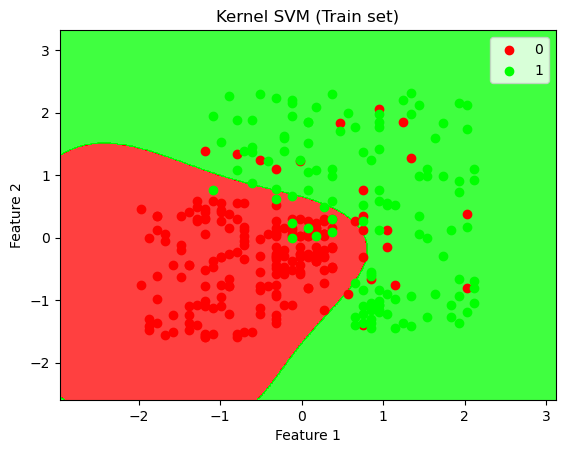

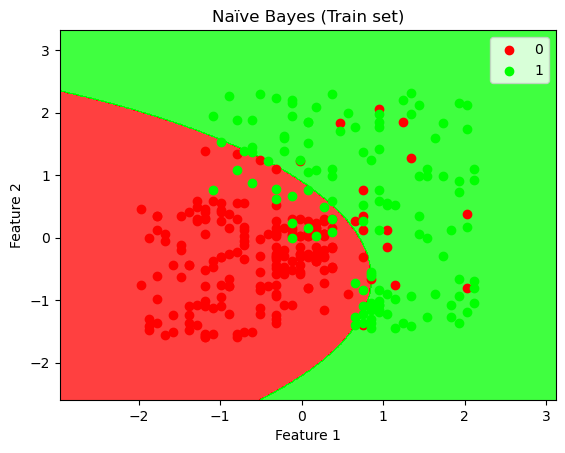

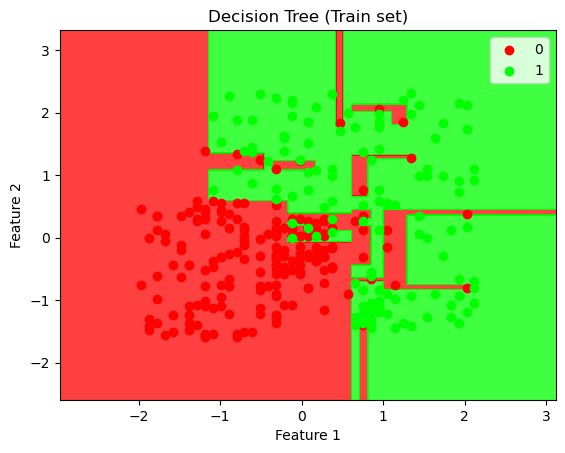

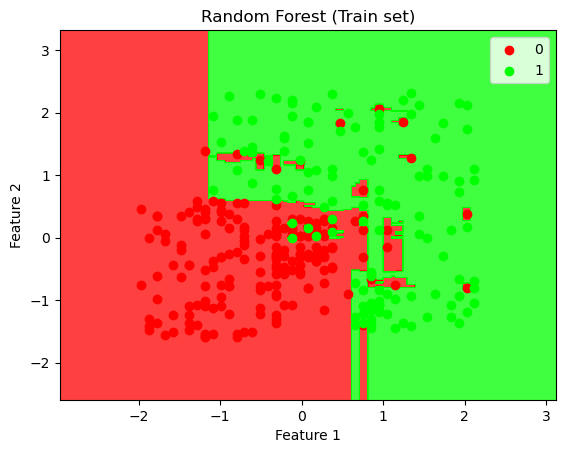

In [13]:
plt.figure()
X_set, y_set = Xtrain_scalled, Y_train
# Creating a meshgrid for plotting decision boundaries
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
X_mesh = np.array([X1.ravel(), X2.ravel()]).T

# Plotting decision boundaries for each model
for name, model in models.items():
    plt.figure()
    plt.contourf(X1, X2, model.predict(X_mesh).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(['#ff0000', '#00ff00']))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['#ff0000', '#00ff00'])(i), label=j)
    plt.title(name + ' (Train set)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# 9-Visualizing the Test set result

<Figure size 640x480 with 0 Axes>

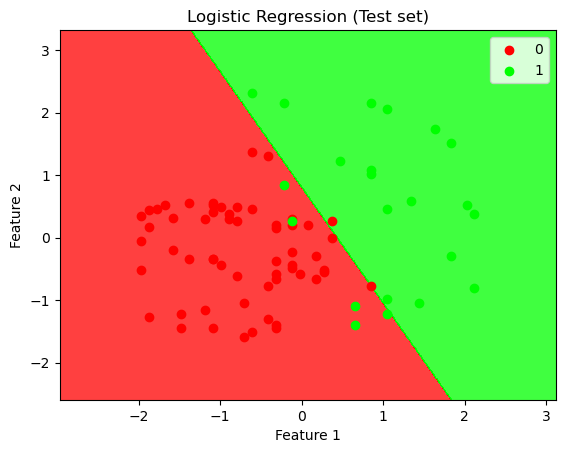

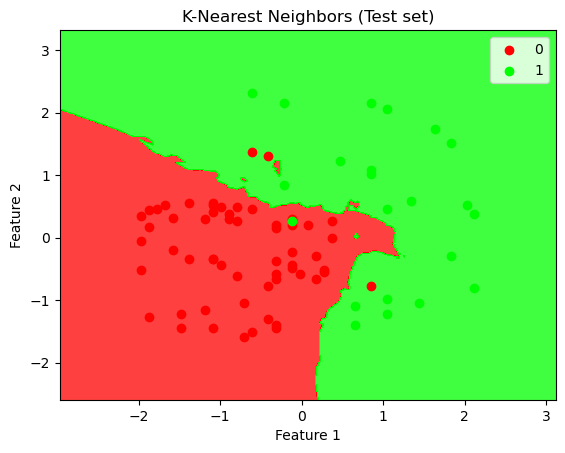

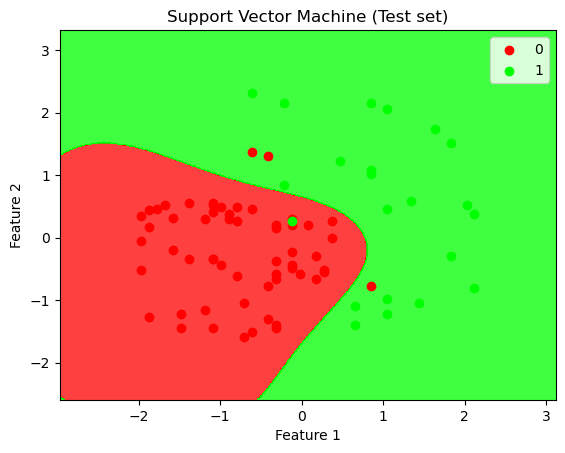

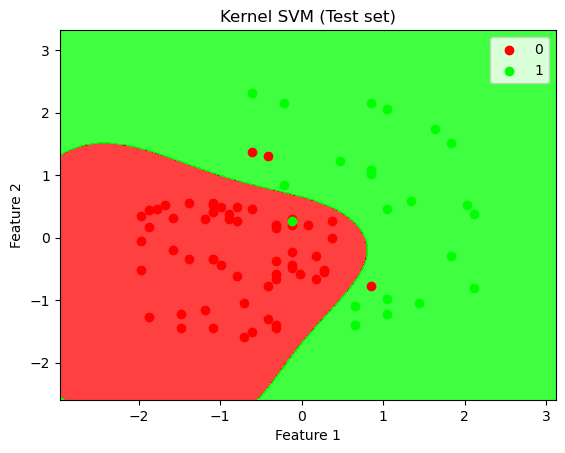

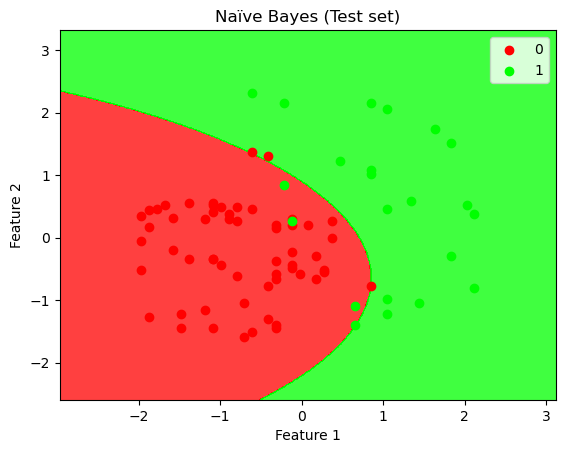

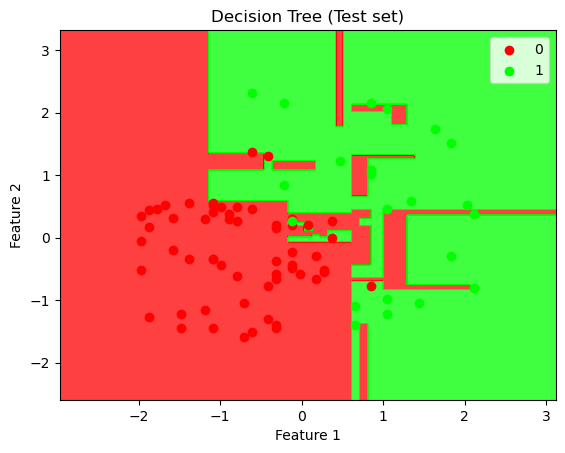

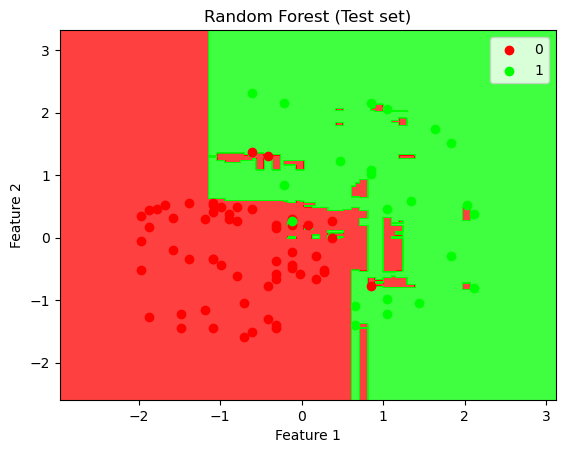

In [14]:
plt.figure()
X_set, y_set = Xtest_scalled, Y_test
# Creating a meshgrid for plotting decision boundaries
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
X_mesh = np.array([X1.ravel(), X2.ravel()]).T

# Plotting decision boundaries for each model
for name, model in models.items():
    plt.figure()
    plt.contourf(X1, X2, model.predict(X_mesh).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(['#ff0000', '#00ff00']))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['#ff0000', '#00ff00'])(i), label=j)
    plt.title(name + ' (Test set)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# ثانيا:ً قارن بين الخوارزميات السابقة من حيث الأداء

In [15]:
# Print the results to compare the performance of different algorithms
print('Performance Comparison:')
for name, acc in results.items():
    print(f'{name}: {acc}')

Performance Comparison:
Logistic Regression: 0.925
K-Nearest Neighbors: 0.95
Support Vector Machine: 0.95
Kernel SVM: 0.95
Naïve Bayes: 0.9125
Decision Tree: 0.9
Random Forest: 0.9375


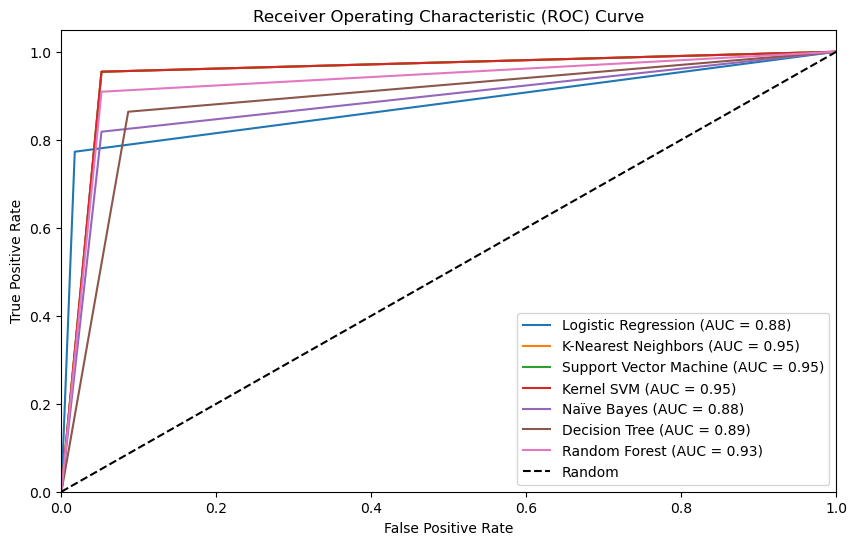

In [16]:
# Plotting ROC curves for each model
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for name, model in models.items():
    y_score = model.predict(Xtest_scalled)
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# قم بكتابه كود فى الصيغه العامه يمكن استخدامه مع اي خوارزميه من خوارزميات التصنيف لبناء اي نموذج

In [17]:
# تحديد الخطوات في pipeline
model = SVC()
steps = [
    ('scaler', StandardScaler()),  # تحويل 
    ('model', model)  # اختيار الخوارزمية
]
# بناء pipeline
model = Pipeline(steps)
# تدريب النموذج
model.fit(X_train, Y_train)
# تقييم النموذج
accuracy = model.score(X_test, Y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.95
